In [1]:
import sys

sys.path.append("..")
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
results_paths = {
    "Stone Age": "../experiments/results_MultiLayerAblation_-_Stone_Age_02_04_25_13_49.csv",
    "MLP": "../experiments/results_MultiLayerAblation_-_Bronze_Age_(MLP)_02_04_25_17_45.csv",
    "DCR":"../experiments/results_MultiLayerAblation_-_DCR_02_04_25_13_49.csv",
    "CMR": "../experiments/results_MultiLayerAblation_-_CMR_02_04_25_17_20.csv",
}

def load_results(key, path):
    df = pd.read_csv(path)
    df["Experiment"] = key
    return df

df = pd.concat([load_results(key, path) for key, path in results_paths.items()])
df = df[df["num_layers"] < 5]
df["Number of Layers"] = df["num_layers"]

<Axes: xlabel='num_layers', ylabel='test_accuracy'>

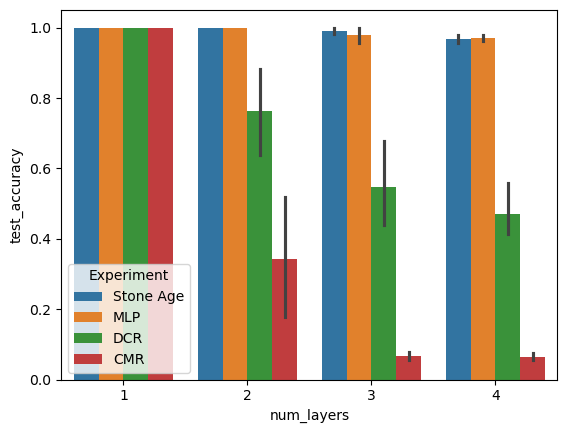

In [3]:
sns.barplot(data=df, x="num_layers", y="test_accuracy", hue="Experiment")

In [4]:
def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group < lower_bound) | (group > upper_bound)]

outliers = df.groupby(["Experiment", "Number of Layers"])["test_accuracy"].apply(find_outliers).to_frame().reset_index()
outliers

,Experiment,Number of Layers,level_2,test_accuracy
0,DCR,3,27,0.901
1,DCR,3,28,0.937
2,DCR,4,33,0.845
3,MLP,1,4,0.999
4,MLP,2,18,0.999
5,MLP,3,21,0.931
6,MLP,3,29,0.898
7,Stone Age,2,18,0.998
8,Stone Age,4,35,0.999
9,Stone Age,4,38,1.000


In [5]:
outliers.items()

<generator object DataFrame.items at 0x175774c70>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

def get_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'two-column':
        width_pt = 234.8775
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

# not sure the subfigures stuff works properly.
# you can get width and height for a figure with golden ratio by calling
get_size("two-column") 

(3.25, 2.0086104634371584)

/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_76868/3600542136.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=df, x="Experiment", y="test_accuracy", hue="Number of Layers", capsize=0.2, errorbar="se", errwidth=1.5, dodge=True, ax=ax)


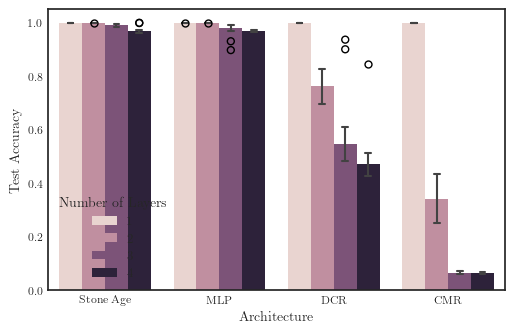

In [ ]:

from matplotlib.colors import to_rgba
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=get_size("thesis"))

color_dict = {i: to_rgba('black', 0.0) for i in df['num_layers'].unique()}

sns.barplot(data=df, x="Experiment", y="test_accuracy", hue="Number of Layers", capsize=0.2, errorbar="se", errwidth=1.5, dodge=True, ax=ax)
# add outliers
sns.stripplot(data=outliers, x="Experiment", y="test_accuracy", hue="Number of Layers", jitter=False, dodge=True, edgecolor='black', linewidth=1, ax=ax, legend=None, palette=color_dict)
#ax2.legend_.remove()
ax.set_xlabel("Architecture")
ax.set_ylabel("Test Accuracy")

sns.move_legend(ax, "lower left", title="Number of Layers", frameon=True)

# set legend title
#ax.legend_.set_title("Number of Layers")
#leg = ax.legend(title="Number of Layers", loc='lower left')
# background color


plt.savefig("outliers.pdf", dpi=300, bbox_inches='tight')

<Axes: xlabel='Experiment', ylabel='test_accuracy'>

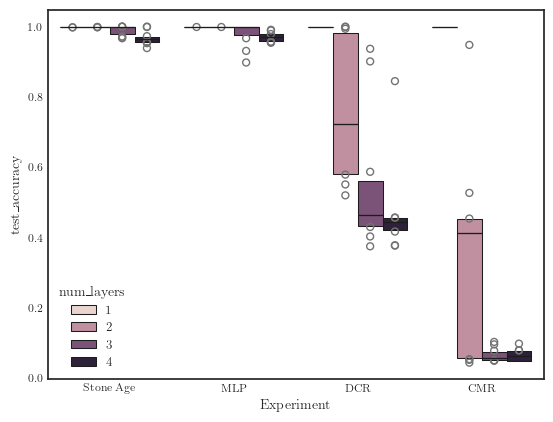

In [8]:
sns.boxenplot(data=df, x="Experiment", y="test_accuracy", hue="num_layers")

<Axes: xlabel='num_layers', ylabel='test_accuracy'>

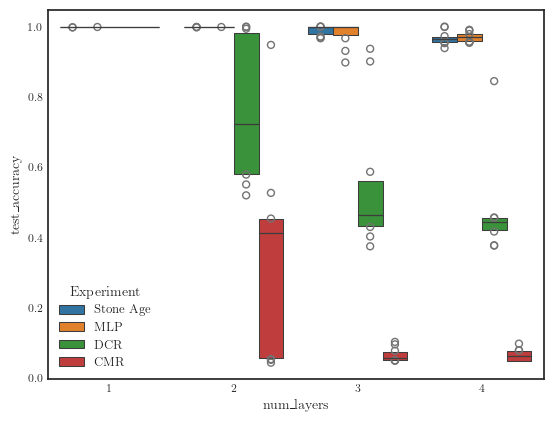

In [9]:
sns.boxenplot(data=df, x="num_layers", y="test_accuracy", hue="Experiment")

<Axes: xlabel='num_layers', ylabel='test_accuracy'>

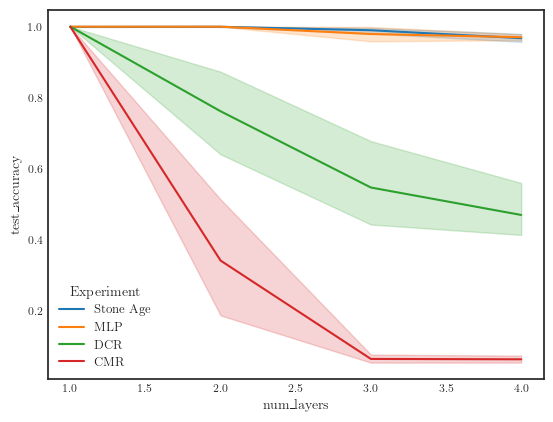

In [10]:
sns.lineplot(data=df, x="num_layers", y="test_accuracy", hue="Experiment")